In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [31]:
train = pd.read_csv('train.csv')

In [32]:
use_col = [x for x in train.columns if x != "Survived"]
X = train[use_col]
y = train.Survived

In [35]:
# ベースライン（男女で分類）
X['y_pred'] = X["Sex"].map({'female': 1, 'male': 0})

In [36]:
accuracy_score(y,X['y_pred'] )

0.7867564534231201

In [37]:
X['y_pred'].value_counts()

0    577
1    314
Name: y_pred, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

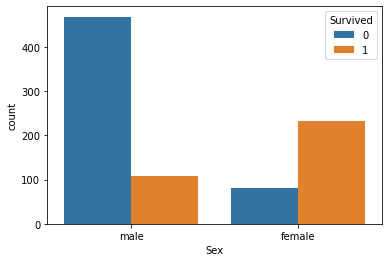

In [38]:
sns.countplot(x=X["Sex"], hue=y)

この状態からルールベースで女性で0、男性で1の人を分類する方法を見つけたい

In [40]:
# 女性でなくなっているのは２０〜３０代でEmbarkedがS,Q, thirdfloor
# 男性で1 -> 10歳以下


In [41]:
tmp[tmp['Sex']=='female']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,y_pred
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,1
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,1
885,886,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,1
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1


In [43]:
# 女性でなくなっているのは２０〜３０代でEmbarkedがS,Q, thirdfloor
# 男性で1 -> 10歳以下
tmp = X.loc[(X['Sex']=='female') & (X['Age']<50) & (X['Age']>=40) & (X['Pclass']==3)]


In [44]:
tmp['y_pred'] = 0

<ipython-input-44-43b18646c836>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['y_pred'] = 0


In [45]:
tmp.index

Int64Index([40, 132, 167, 254, 276, 362, 638, 678, 736], dtype='int64')

In [46]:
tmp = pd.concat([X.drop(index=[40, 132, 167, 254, 276, 362, 638, 678, 736]), tmp])

In [47]:
tmp = tmp.sort_index()

In [48]:
tmp['y_pred']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: y_pred, Length: 891, dtype: int64

In [85]:
tmp['y_pred'].value_counts()

0    586
1    305
Name: y_pred, dtype: int64

In [52]:
accuracy_score(y, tmp['y_pred'])

0.7968574635241302

1%ほど上昇

In [64]:
X.loc[(X['Sex']=='male') & (X['Age']<10) & (X['Pclass']==2)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,y_pred
78,79,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,0
183,184,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S,0
193,194,2,"Navratil, Master. Michel M",male,3.00,1,1,230080,26.0000,F2,S,0
340,341,2,"Navratil, Master. Edmond Roger",male,2.00,1,1,230080,26.0000,F2,S,0
407,408,2,"Richards, Master. William Rowe",male,3.00,1,1,29106,18.7500,NaN,S,0
549,550,2,"Davies, Master. John Morgan Jr",male,8.00,1,1,C.A. 33112,36.7500,NaN,S,0
755,756,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,0
827,828,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C,0
831,832,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,0


In [77]:
test_age = X.loc[(X['Sex']=='male') & (X['Age']<10) & (X['Pclass']==2)]

In [78]:
test_age

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,y_pred
78,79,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,0
183,184,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S,0
193,194,2,"Navratil, Master. Michel M",male,3.00,1,1,230080,26.0000,F2,S,0
340,341,2,"Navratil, Master. Edmond Roger",male,2.00,1,1,230080,26.0000,F2,S,0
407,408,2,"Richards, Master. William Rowe",male,3.00,1,1,29106,18.7500,NaN,S,0
549,550,2,"Davies, Master. John Morgan Jr",male,8.00,1,1,C.A. 33112,36.7500,NaN,S,0
755,756,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,0
827,828,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C,0
831,832,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,0


In [79]:
test_age['y_pred'] = 1

<ipython-input-79-b87475c29562>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_age['y_pred'] = 1


In [80]:
test_age

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,y_pred
78,79,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,1
183,184,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S,1
193,194,2,"Navratil, Master. Michel M",male,3.00,1,1,230080,26.0000,F2,S,1
340,341,2,"Navratil, Master. Edmond Roger",male,2.00,1,1,230080,26.0000,F2,S,1
407,408,2,"Richards, Master. William Rowe",male,3.00,1,1,29106,18.7500,NaN,S,1
549,550,2,"Davies, Master. John Morgan Jr",male,8.00,1,1,C.A. 33112,36.7500,NaN,S,1
755,756,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,1
827,828,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C,1
831,832,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,1


In [81]:
test_age.index

Int64Index([78, 183, 193, 340, 407, 549, 755, 827, 831], dtype='int64')

In [82]:
test_age = pd.concat([tmp.drop(index=[ 78, 183, 193, 340, 407, 549, 755, 827, 831]), test_age]).sort_index()

In [83]:
test_age

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,y_pred
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [84]:
accuracy_score(y, test_age['y_pred'])

0.8069584736251403

0.5%ほど上昇

In [88]:
X.loc[(X['Sex']=='male') & (X['Age']<50) & (X['Age']>=40) & (X['Pclass']==1)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,y_pred
30,31,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,0
35,36,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S,0
62,63,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S,0
92,93,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E31,S,0
110,111,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0000,C110,S,0
187,188,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0,0,111428,26.5500,NaN,S,0
209,210,1,"Blank, Mr. Henry",male,40.0,0,0,112277,31.0000,A31,C,0
245,246,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,0
263,264,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S,0
331,332,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S,0


In [89]:
X.loc[(X['Sex']=='male') & (X['Age']<30) & (X['Age']>=20) & (X['Embarked']=='C')]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,y_pred
34,35,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,0
57,58,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C,0
60,61,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C,0
73,74,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C,0
97,98,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C,0
118,119,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,0
135,136,2,"Richard, Mr. Emile",male,23.0,0,0,SC/PARIS 2133,15.0458,NaN,C,0
139,140,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C,0
207,208,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C,0
296,297,3,"Hanna, Mr. Mansour",male,23.5,0,0,2693,7.2292,NaN,C,0
